In [1]:
import numpy as np
import pandas as pd


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Demoday_Project/Dataset/BBC_smaller'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install transformers
!pip install nltk

In [5]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
import tensorflow.keras

In [10]:
dataset_path = '/content/drive/MyDrive/Demoday_Project/Dataset/BBC_smaller'
articles_path = sorted(glob.glob(os.path.join(dataset_path, "articles/*.txt")))
summaries_path = sorted(glob.glob(os.path.join(dataset_path, "summaries/*.txt")))
print(articles_path[3], summaries_path[3])

/content/drive/MyDrive/Demoday_Project/Dataset/BBC_smaller/articles/Copie de 004.txt /content/drive/MyDrive/Demoday_Project/Dataset/BBC_smaller/summaries/Copie de 004.txt


In [7]:
articles = []
summaries = []

for article_path, summary_path in zip(articles_path, summaries_path):
    with open(article_path, "r", encoding="ISO-8859-1") as article_file:
        article_text = article_file.read()
        articles.append(article_text)

    with open(summary_path, "r", encoding="ISO-8859-1") as summary_file:
        summary_text = summary_file.read()
        summaries.append(summary_text)

In [ ]:
#categories_list = os.listdir(os.path.join(dataset_path, 'articles'))
#categories = []
#def print_file_data():
#    for category in categories_list:
#        article_paths = glob.glob(os.path.join(dataset_path, "articles", category, "*.txt"))
#        summary_paths = glob.glob(os.path.join(dataset_path, "summaries", category, "*.txt"))

#        for i in article_paths:
#            categories.append(category)

#        if len(article_paths) != len(summary_paths):
#            print("Length of dataset not equal for subdirectory :", category)
#        else:
#            print(f"Found {len(article_paths)} articles and {len(summary_paths)} summaries in the subdirectory : {category}")

#print_file_data()

In [14]:
df = pd.DataFrame({
    'Articles' : articles,
    'Summaries' : summaries,
    # 'Categories' : categories
})

df.head()

,Articles,Summaries
0,Gallery unveils interactive tree\n\nA Christma...,"The messages will be ""unwrapped"" by sculptor R..."
1,Jarre joins fairytale celebration\n\nFrench mu...,Bloom is to be formally presented with the Han...
2,Musical treatment for Capra film\n\nThe classi...,The classic film It's A Wonderful Life is to b...
3,Richard and Judy choose top books\n\nThe 10 au...,"""It was very hard to follow last year's extrem..."
4,Poppins musical gets flying start\n\nThe stage...,Mary Poppins was originally created by author ...


In [15]:
df['cleaned_text'] = df['Articles'].str.replace(r"\n", " ")
df['cleaned_text'] = df['cleaned_text'].fillna('').apply(lambda x: x.lower())
df['cleaned_summary'] = df['Summaries'].str.replace(r"\n", " ")
df['cleaned_summary'] = df['cleaned_summary'].fillna('').apply(lambda x: x.lower())

In [16]:
df.head()

,Articles,Summaries,cleaned_text,cleaned_summary
0,Gallery unveils interactive tree\n\nA Christma...,"The messages will be ""unwrapped"" by sculptor R...",gallery unveils interactive tree a christmas ...,"the messages will be ""unwrapped"" by sculptor r..."
1,Jarre joins fairytale celebration\n\nFrench mu...,Bloom is to be formally presented with the Han...,jarre joins fairytale celebration french musi...,bloom is to be formally presented with the han...
2,Musical treatment for Capra film\n\nThe classi...,The classic film It's A Wonderful Life is to b...,musical treatment for capra film the classic ...,the classic film it's a wonderful life is to b...
3,Richard and Judy choose top books\n\nThe 10 au...,"""It was very hard to follow last year's extrem...",richard and judy choose top books the 10 auth...,"""it was very hard to follow last year's extrem..."
4,Poppins musical gets flying start\n\nThe stage...,Mary Poppins was originally created by author ...,poppins musical gets flying start the stage a...,mary poppins was originally created by author ...


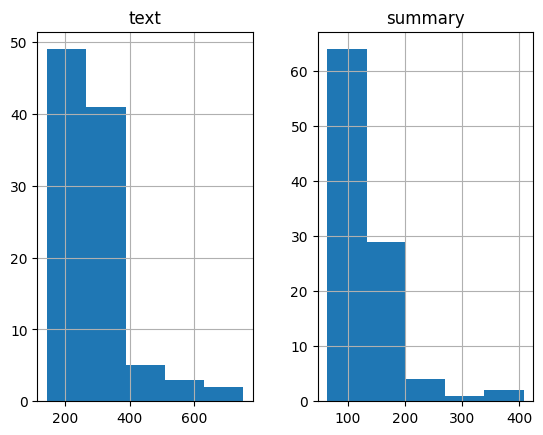

In [17]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in df['cleaned_text']:
    text_count.append(len(sent.split()))

for sent in df['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [18]:
cnt = 0
for i in df['cleaned_text']:
    if len(i.split()) <= 700:
        cnt = cnt + 1
print(cnt / len(df['cleaned_text']))

0.99


In [19]:
# Check how much % of text have 0-500 words
cnt = 0
for i in df['cleaned_summary']:
    if len(i.split()) <= 320:
        cnt = cnt + 1
print(cnt / len(df['cleaned_summary']))

0.98


In [90]:
max_text_len = 700
max_summary_len = 320

cleaned_text = np.array(df['cleaned_text'])
cleaned_summary= np.array(df['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:3802 in get_loc              │
│                                                                                                  │
│   3799 │   │   │   │   )                                                                         │
│   3800 │   │   │   casted_key = self._maybe_cast_indexer(key)                                    │
│   3801 │   │   │   try:                                                                          │
│ ❱ 3802 │   │   │   │   return self._engine.get_loc(casted_key)                                   │
│   3803 │   │   │   except KeyError as err:                                                       │
│   3804 │   │   │   │   raise KeyError(key) from err                                              │
│   3805 │   │   │   except TypeError:                                                             │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:138                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:165                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5745                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5753                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'cleaned_text'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:4                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:3807 in __getitem__                 │
│                                                                                                  │
│    3804 │   │   if is_single_key:                                                                │
│    3805 │   │   │   if self.columns.nlevels > 1:                                                 │
│    3806 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  3807 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    3808 │   │   │   if is_integer(indexer):                                                      │
│    3809 │   │   │   │   indexer = [indexer]                                                      │
│    3810 │   │   else:                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:3804 in get_loc              │
│                                                                                                  │
│   3801 │   │   │   try:                                                                          │
│   3802 │   │   │   │   return self._engine.get_loc(casted_key)                                   │
│   3803 │   │   │   except KeyError as err:                                                       │
│ ❱ 3804 │   │   │   │   raise KeyError(key) from err                                              │
│   3805 │   │   │   except TypeError:                            

In [30]:
!pip install -q -U trl transformers accelerate git+https://github.com/huggingface/peft.git


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
post_summary = pd.DataFrame({'summary':post_pre['summary'],})
post_summary

In [82]:
post_articles.head()

,text
0,gallery unveils interactive tree a christmas ...
1,jarre joins fairytale celebration french musi...
2,musical treatment for capra film the classic ...
3,richard and judy choose top books the 10 auth...
4,poppins musical gets flying start the stage a...


In [55]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from transformers import AdamW
#Loading model
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

In [ ]:
print(model)

In [ ]:
config = model.config
print(config)

In [58]:
model.parameters()

<generator object Module.parameters at 0x7f88b47e4190>

In [59]:
for param in model.parameters():
    param.requires_grad = False

In [79]:
last_layer = model.model.decoder.layers[-1]
print(last_layer)

BartDecoderLayer(
  (self_attn): BartAttention(
    (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (activation_fn): GELUActivation()
  (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (encoder_attn): BartAttention(
    (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (fc1): Linear(in_features=1024, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1024, bias=True)
  (final_layer_norm): Laye

In [78]:
from transformers import BartModel

dimension = model.config.d_model
dimension

1024

In [89]:
post_pre['text'].to_list()[0]

'gallery unveils interactive tree  a christmas tree that can receive text messages has been unveiled at london\'s tate britain art gallery.  the spruce has an antenna which can receive bluetooth texts sent by visitors to the tate. the messages will be "unwrapped" by sculptor richard wentworth, who is responsible for decorating the tree with broken plates and light bulbs. it is the 17th year that the gallery has invited an artist to dress their christmas tree. artists who have decorated the tate tree in previous years include tracey emin in 2002.  the plain green norway spruce is displayed in the gallery\'s foyer. its light bulb adornments are dimmed, ordinary domestic ones joined together with string. the plates decorating the branches will be auctioned off for the children\'s charity artworks. wentworth worked as an assistant to sculptor henry moore in the late 1960s. his reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during the last

In [88]:
post_pre['summary'].to_list()[0]

'the messages will be "unwrapped" by sculptor richard wentworth, who is responsible for decorating the tree with broken plates and light bulbs.a christmas tree that can receive text messages has been unveiled at london\'s tate britain art gallery.it is the 17th year that the gallery has invited an artist to dress their christmas tree.the spruce has an antenna which can receive bluetooth texts sent by visitors to the tate.his reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during the last two decades.'

In [92]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer



# Prepare input and target tensors
input_text = str(post_pre['text'])
target_text = str(post_pre['summary'])

input_ids = tokenizer.encode(input_text, return_tensors="pt")
target_ids = tokenizer.encode(target_text, return_tensors="pt")

# Generate output from the model
outputs = model(input_ids, labels=target_ids)
loss = outputs.loss

# Compute the cost/loss
cost = loss.item()

print("Cost:", cost)


Cost: 3.193061113357544
